In [1]:
using POMDPs
using LaserTag
using ParticleFilters
using POMDPToolbox
using QMDP
using DiscreteValueIteration
using Interact
value = Interact.value

value (generic function with 2 methods)

In [4]:
p = gen_lasertag(rng=MersenneTwister(5), reading_std=2.5, discrete=true)
up = SIRParticleFilter(p, 100000)
policy = solve(QMDPSolver(), p, verbose=true)
# policy = solve(OptimalMLSolver(ValueIterationSolver()), p)
hr = HistoryRecorder(max_steps=100, rng=MersenneTwister(3))
hist = simulate(hr, p, policy, up)
ns = n_steps(hist)-1

Iteration : 1, residual: 10.0, iteration run-time: 0.012866286, total run-time: 0.012866286
Iteration : 2, residual: 9.5, iteration run-time: 0.023979954, total run-time: 0.03684624
Iteration : 3, residual: 9.024999999999999, iteration run-time: 0.01238848, total run-time: 0.04923472
Iteration : 4, residual: 8.573749999999999, iteration run-time: 0.012043483, total run-time: 0.061278203
Iteration : 5, residual: 8.145062499999998, iteration run-time: 0.012059013, total run-time: 0.07333721600000001
Iteration : 6, residual: 7.737809374999998, iteration run-time: 0.012017481, total run-time: 0.08535469700000001
Iteration : 7, residual: 7.350918906249998, iteration run-time: 0.012240061, total run-time: 0.097594758
Iteration : 8, residual: 6.983372960937498, iteration run-time: 0.014367144, total run-time: 0.111961902
Iteration : 9, residual: 6.634204312890622, iteration run-time: 0.013009465, total run-time: 0.124971367
Iteration : 10, residual: 4.45901457380161, iteration run-time: 0.012

99

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 50 Int64 ,"i",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

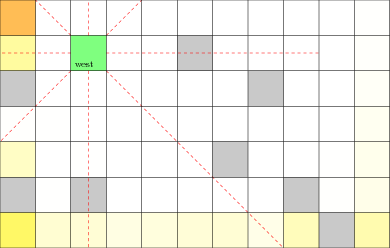

In [5]:
@manipulate for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    LaserTagVis(p, s=s, a=a, o=o, b=b)
end

In [4]:
i=0

0

In [7]:
i+=1
s = state_hist(hist)[i+1]
o = observation_hist(hist)[i]
a = action_hist(hist)[i+1]
b = belief_hist(hist)[i+1]
r = reward_hist(hist)[i+1]
LaserTagVis(p, s=s, a=a, o=o, b=b, r=r)

LoadError: BoundsError: attempt to access 50-element Array{Int64,1} at index [51]

In [6]:
using Reel
frames = Frames(MIME("image/png"), fps=2)
for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    r = reward_hist(hist)[i+1]
    push!(frames, LaserTagVis(p, s=s, a=a, o=o, b=b, r=r))
    print(".")
end

write("/tmp/lasertag.gif", frames)

.................................................

"/tmp/lasertag.gif"